<a href="https://colab.research.google.com/github/sakshamjn/Analyzing-Global-Temperature/blob/master/global_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
plt.style.use('ggplot')

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
dataFrame = pd.read_csv('/content/drive/My Drive/GlobalTemperatures.csv')
dataFrame.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataFrame.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


In [ ]:
d1 = dataFrame.iloc[:,:2]  # Throwing off unnecessary data, for now.
d1.head()

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083
2,1750-03-01,5.626
3,1750-04-01,8.490
4,1750-05-01,11.573


In [ ]:
data = d1['LandAverageTemperature']
mean_temp = data.mean()
variance = data.var()
std = data.std()
print('Mean temperature throughout the years: %.3f celsius' % mean_temp)
print('Temperature variance throughout the dataset: %.3f celsius squared' % variance)
print('Temperature standard deviation throughout the dataset: %.3f celsius' % std)

Mean temperature throughout the years: 8.375 celsius
Temperature variance throughout the dataset: 19.196 celsius squared
Temperature standard deviation throughout the dataset: 4.381 celsius


In [ ]:
times = pd.DatetimeIndex(d1['dt'])
grouped = d1.groupby([times.year]).mean()

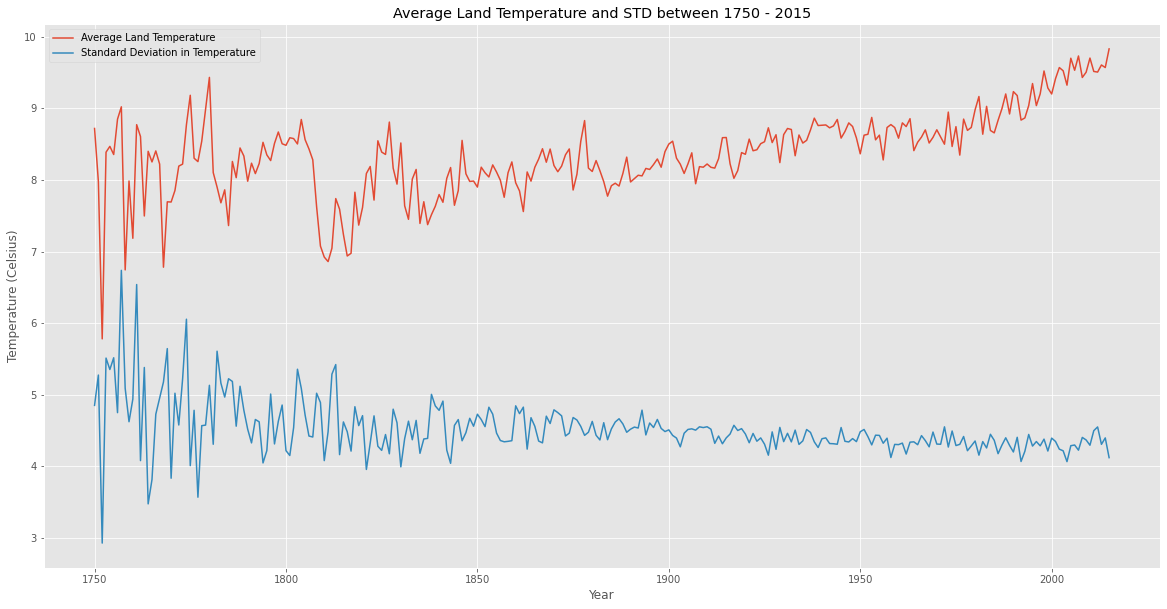

In [ ]:
plt.figure(figsize= (20,10))
std_grouped = d1.groupby([times.year]).std()
plt.plot(grouped['LandAverageTemperature'])
plt.plot(std_grouped['LandAverageTemperature'])
plt.title('Average Land Temperature and STD between 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend(['Average Land Temperature', 'Standard Deviation in Temperature'])
plt.show()

In [ ]:
grouped.head()

,LandAverageTemperature
dt,
1750,8.719364
1751,7.976143
1752,5.779833
1753,8.388083
1754,8.469333


In [ ]:
grouped.tail()

,LandAverageTemperature
dt,
2011,9.516000
2012,9.507333
2013,9.606500
2014,9.570667
2015,9.831000


In [ ]:
d1[times.year == 1752]

,dt,LandAverageTemperature
24,1752-01-01,0.348
25,1752-02-01,NaN
26,1752-03-01,5.806
27,1752-04-01,8.265
28,1752-05-01,NaN
29,1752-06-01,NaN
30,1752-07-01,NaN
31,1752-08-01,NaN
32,1752-09-01,NaN
33,1752-10-01,7.839


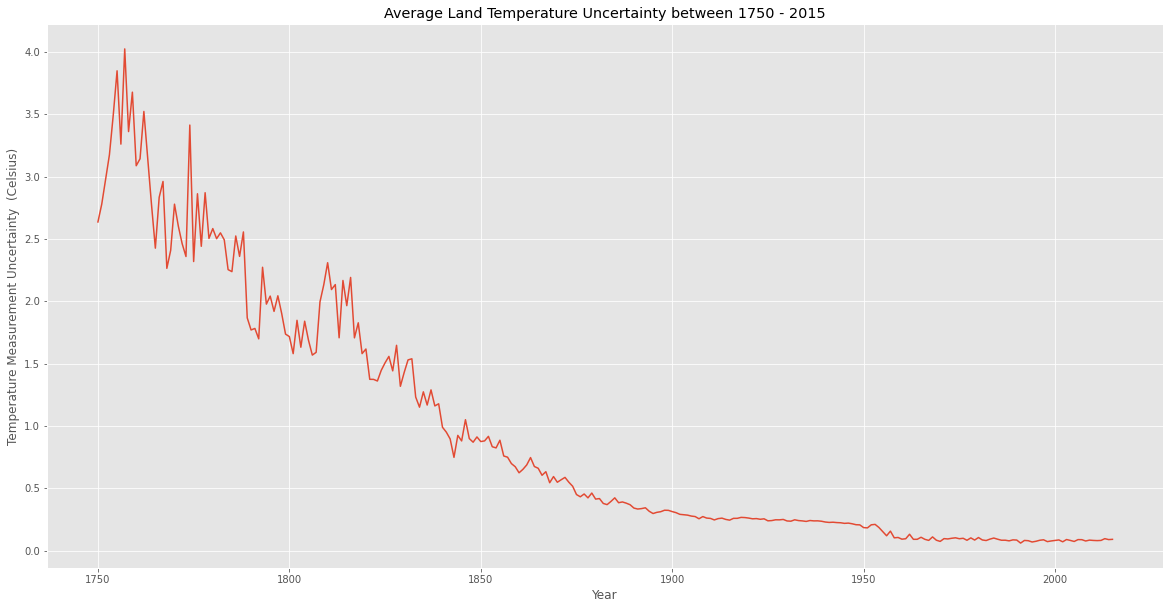

In [ ]:
d2 = dataFrame[['dt', 'LandAverageTemperatureUncertainty']]
uncertainty_group = d2.groupby([times.year]).mean()
plt.figure(figsize= (20,10))
plt.plot(uncertainty_group['LandAverageTemperatureUncertainty'])
plt.title('Average Land Temperature Uncertainty between 1750 - 2015')
plt.xlabel('Year')
plt.ylabel('Temperature Measurement Uncertainty  (Celsius)')
plt.show()

As is ovious from the above plot, technological advances enabled more accurate and precise temperature measurements, which led to ever decreasing uncertainties.

In [ ]:
d1['LandAverageTemperature']= d1['LandAverageTemperature'].fillna(method='ffill')

In [ ]:
# Display coldest and warmest times
min_max_df = dataFrame[['dt', 'LandMaxTemperature', 'LandMinTemperature']]
warmest_time_idx = min_max_df['LandMaxTemperature'].idxmax()
warmest_time = min_max_df.loc[warmest_time_idx]['dt']
max_temp = min_max_df['LandMaxTemperature'].max()
print('Highest temperature recorded: %.3f celsius in %s %s' % (max_temp, months[int(warmest_time.split('-')[1])-1], warmest_time[:4]))

coldest_time_idx = min_max_df['LandMinTemperature'].idxmin()
coldest_time = min_max_df.loc[coldest_time_idx]['dt']
min_temp = min_max_df['LandMinTemperature'].min()
print('Lowest temperature recorded: %.3f celsius in %s %s' % (min_temp, months[int(coldest_time.split('-')[1])-1], coldest_time[:4]))
print('Temperature range: %.3f celsius' % (max_temp-min_temp))
# Display coldest and warmest years
warmest_year = grouped['LandAverageTemperature'].idxmax()
max_avg_temp = grouped.loc[warmest_year]['LandAverageTemperature']
print('\nWarmest year -> %s : %.3f celsius' % (warmest_year, max_avg_temp))


coldest_year = grouped['LandAverageTemperature'].idxmin()
min_avg_temp = grouped.loc[coldest_year]['LandAverageTemperature']
print('Coldest year -> %s : %.3f celsius' % (coldest_year, min_avg_temp))

Highest temperature recorded: 21.320 celsius in July 2011
Lowest temperature recorded: -5.407 celsius in January 1857
Temperature range: 26.727 celsius

Warmest year -> 2015 : 9.831 celsius
Coldest year -> 1752 : 5.780 celsius


--> Even though the highest temperature recorded was in July 2011, **2015 was the warmest year** as the highest _average_ temperature was recorded in 2015. This hints towards global warming. Also, **the lowest temperature was recorded in 1857, but the coldest year was 1752** as the lowest _average_ temperature.

In [ ]:
# Histogram of temperatures grouped by month - of 1750, 2015 and average of all the years
# Draw the year's average temperature line
first_year_df = d1[:12]
first_year_df = first_year_df.assign(month=pd.Series(months))
first_year_df.set_index("month",drop=True,inplace=True)
first_year_df.rename(columns={'LandAverageTemperature': 'avg_temp_first'}, inplace=True)

final_year_df = d1[-12:]
final_year_df.index = list(range(12))
final_year_df = final_year_df.assign(month=pd.Series(months))
final_year_df.set_index("month",drop=True,inplace=True)
final_year_df.rename(columns={'LandAverageTemperature': 'avg_temp_final'}, inplace=True)

frames = [first_year_df, final_year_df]
temp_variation = pd.concat(frames, axis=1)
temp_variation['diff'] = temp_variation['avg_temp_final'] - temp_variation['avg_temp_first']
temp_variation

,dt,avg_temp_first,dt,avg_temp_final,diff
month,,,,,
January,1750-01-01,3.034,2015-01-01,3.881,0.847
February,1750-02-01,3.083,2015-02-01,4.664,1.581
March,1750-03-01,5.626,2015-03-01,6.740,1.114
April,1750-04-01,8.490,2015-04-01,9.313,0.823
May,1750-05-01,11.573,2015-05-01,12.312,0.739
June,1750-06-01,12.937,2015-06-01,14.505,1.568
July,1750-07-01,15.868,2015-07-01,15.051,-0.817
August,1750-08-01,14.750,2015-08-01,14.755,0.005
September,1750-09-01,11.413,2015-09-01,12.999,1.586


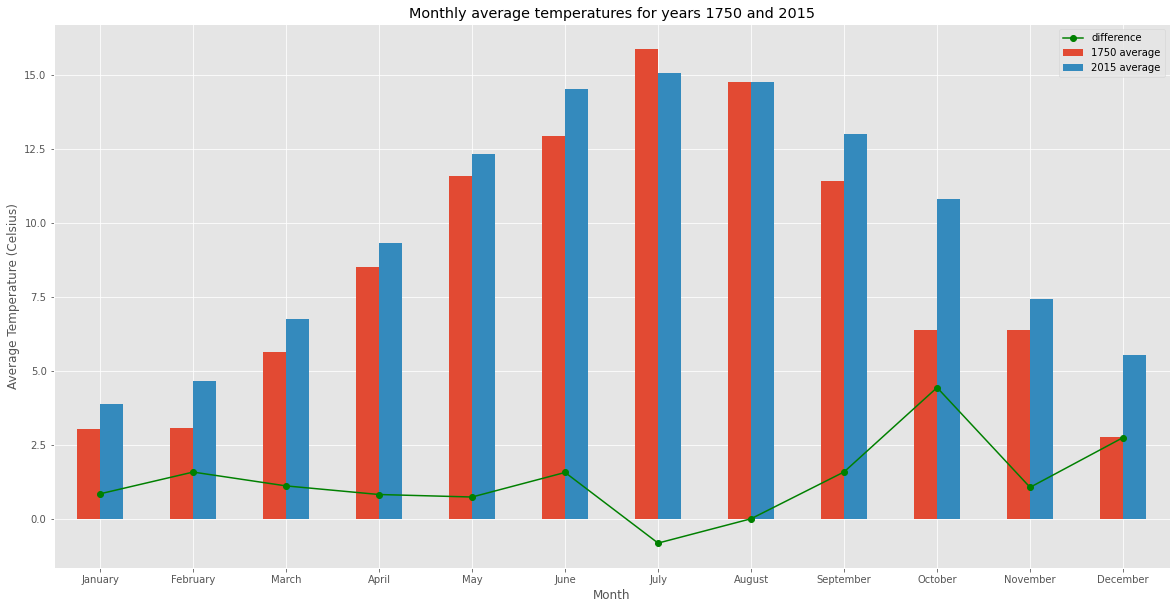

In [ ]:
ax = plt.figure(figsize=(20,10)).gca()
temp_variation.plot(kind='bar', y=['avg_temp_first', 'avg_temp_final'], ax=ax)
temp_variation.plot(kind='line', y=['diff'], style='go-', ax=ax)
plt.title('Monthly average temperatures for years 1750 and 2015')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.legend(['difference', '1750 average', '2015 average'])
plt.show()

As inferred from the above bar chart, most of the 2015 months are warmer compared to 1750 months, **suggesting increasing warmth over time.**
We can also observe that the **temperature *difference* between 1750 and 2015 is highest in October and lowest in August**. Furthermore, the **July 1750 temperature is higher than the July 2015 temperature**, thereby defying the norm followed by other months.

In [ ]:
month_avg_group = d1.groupby([times.month]).mean()
month_avg_group.index = list(range(12))
month_avg_group = month_avg_group.assign(month=pd.Series(months))
month_avg_group.set_index("month",drop=True,inplace=True)

month_avg_group

,LandAverageTemperature
month,
January,2.275211
February,2.951695
March,4.956872
April,8.248688
May,11.129102
June,13.324323
July,14.283259
August,13.739406
September,11.710169


In [ ]:
warmest_month = month_avg_group['LandAverageTemperature'].idxmax()
coldest_month = month_avg_group['LandAverageTemperature'].idxmin()

print('Warmest month throughout the years -> %s : %.3f celsius average temperature' % (warmest_month, month_avg_group.loc[warmest_month]['LandAverageTemperature']))
print('Coldest month throughout the years -> %s : %.3f celsius average temperature' % (coldest_month, month_avg_group.loc[coldest_month]['LandAverageTemperature']))

Warmest month throughout the years -> July : 14.283 celsius average temperature
Coldest month throughout the years -> January : 2.275 celsius average temperature


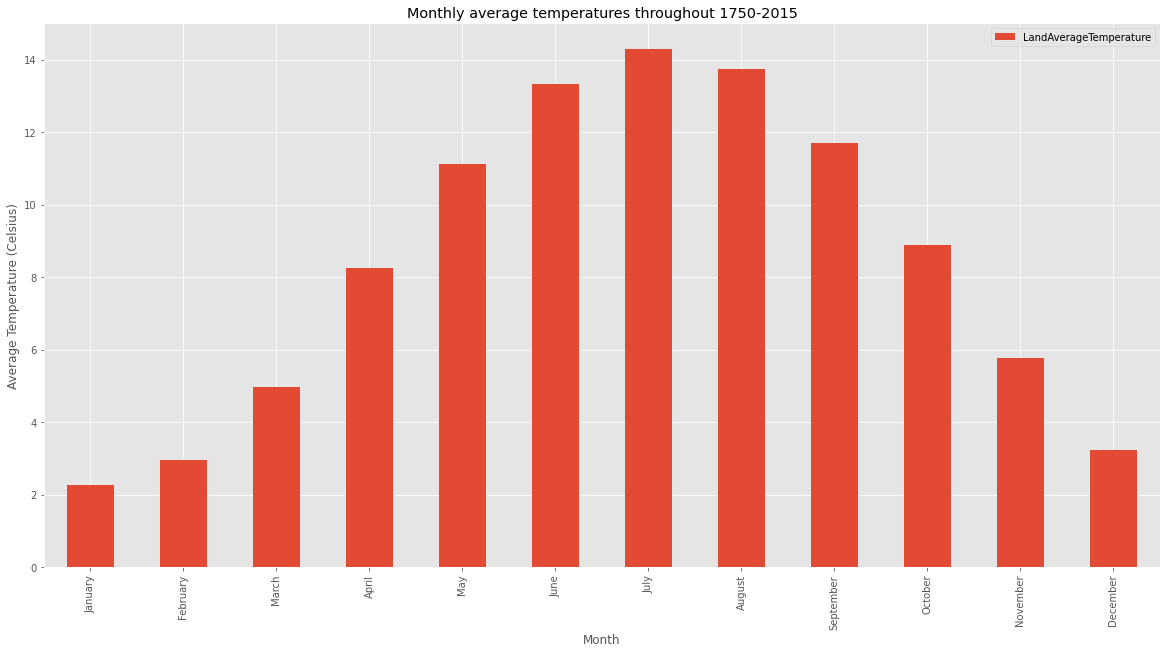

In [ ]:
ax = plt.figure(figsize=(20,10)).gca()
month_avg_group.plot(kind='bar', ax=ax)
plt.title('Monthly average temperatures throughout 1750-2015')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.show()
# Also maybe have running averages in plots

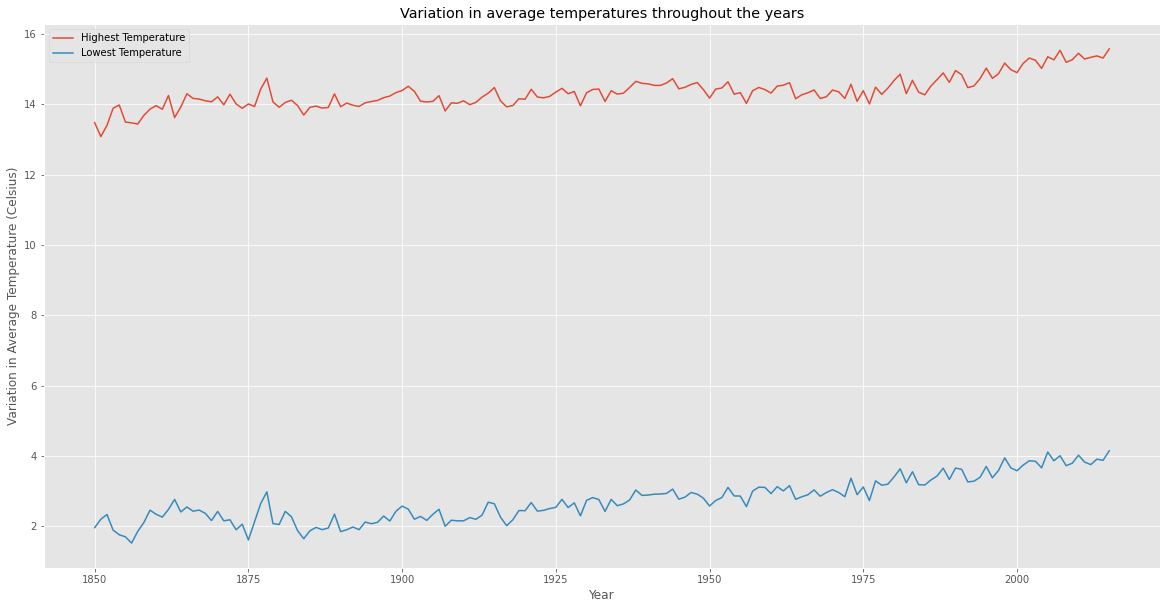

In [ ]:
# plot variation in temperature throughout the years
# First, data preprocessing to group min, max, diff data
# Group by year
yearly_var_group = min_max_df.groupby([times.year]).mean()
yearly_var_group.rename(columns={'LandMaxTemperature': 'max_avg_temp'}, inplace=True)
yearly_var_group.rename(columns={'LandMinTemperature': 'min_avg_temp'}, inplace=True)

yearly_var_group['diff'] = yearly_var_group['max_avg_temp'] - yearly_var_group['min_avg_temp']

ax = plt.figure(figsize=(20,10)).gca()
yearly_var_group.plot(y=['max_avg_temp', 'min_avg_temp'], ax=ax)
plt.title('Variation in average temperatures throughout the years')
plt.xlabel('Year')
plt.ylabel('Variation in Average Temperature (Celsius)')
plt.legend(['Highest Temperature', 'Lowest Temperature'])
plt.show()

We can see that, in recent years, **both the highest and the lowest temperatures show a rise**.

In [ ]:
# Which month shows the highest variation?
month_var_group = min_max_df.groupby([times.month]).mean()
#month_var_group = month_max_group.drop('dt', axis=1)
month_var_group.rename(columns={'LandMaxTemperature': 'max_temp'}, inplace=True)
month_var_group.rename(columns={'LandMinTemperature': 'min_temp'}, inplace=True)

month_var_group.index = list(range(12))

month_var_group = month_var_group.assign(month=pd.Series(months))
month_var_group.set_index("month",drop=True,inplace=True)
month_var_group['diff'] = month_var_group['max_temp'] - month_var_group['min_temp']
month_var_group

,max_temp,min_temp,diff
month,,,
January,8.178657,-2.934572,11.113229
February,8.921410,-2.672711,11.594120
March,11.137169,-0.866500,12.003669
April,14.290331,2.247699,12.042633
May,17.133729,5.179536,11.954193
June,19.226663,7.407331,11.819331
July,20.070217,8.423861,11.646355
August,19.646892,7.960934,11.685958
September,17.831620,6.138301,11.693319


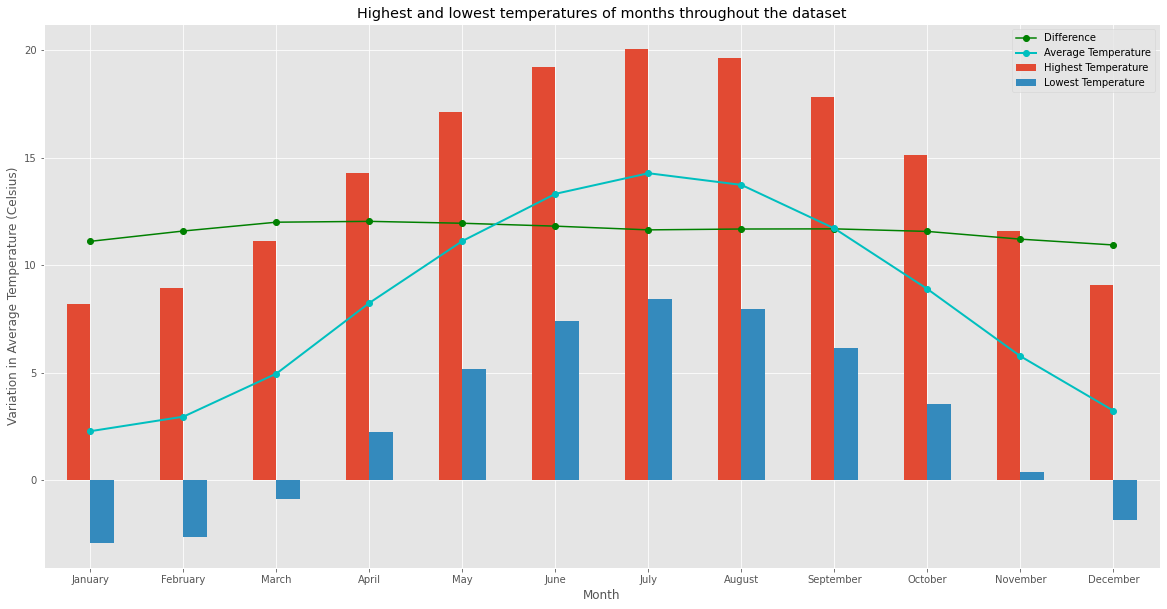

In [ ]:
# Plot the results

ax = plt.figure(figsize=(20,10)).gca()
month_var_group.plot(kind='bar', y=['max_temp', 'min_temp'], ax=ax)
month_var_group.plot(kind='line', y=['diff'], style='go-', ax=ax)
month_avg_group.plot(kind='line', style='co-', linewidth=2.0, ax=ax)
plt.title('Highest and lowest temperatures of months throughout the dataset')
plt.xlabel('Month')
plt.ylabel('Variation in Average Temperature (Celsius)')
plt.legend(['Difference', 'Average Temperature', 'Highest Temperature', 'Lowest Temperature'])
plt.show()

Thus, we observe that the **temperature *difference* remains essentially constant throughout the year**.

In [ ]:
print('Mean temperature difference: %.3f celsius' % (month_var_group['diff'].mean()))

Mean temperature difference: 11.607 celsius


Average temperature range: 21.101 celsius


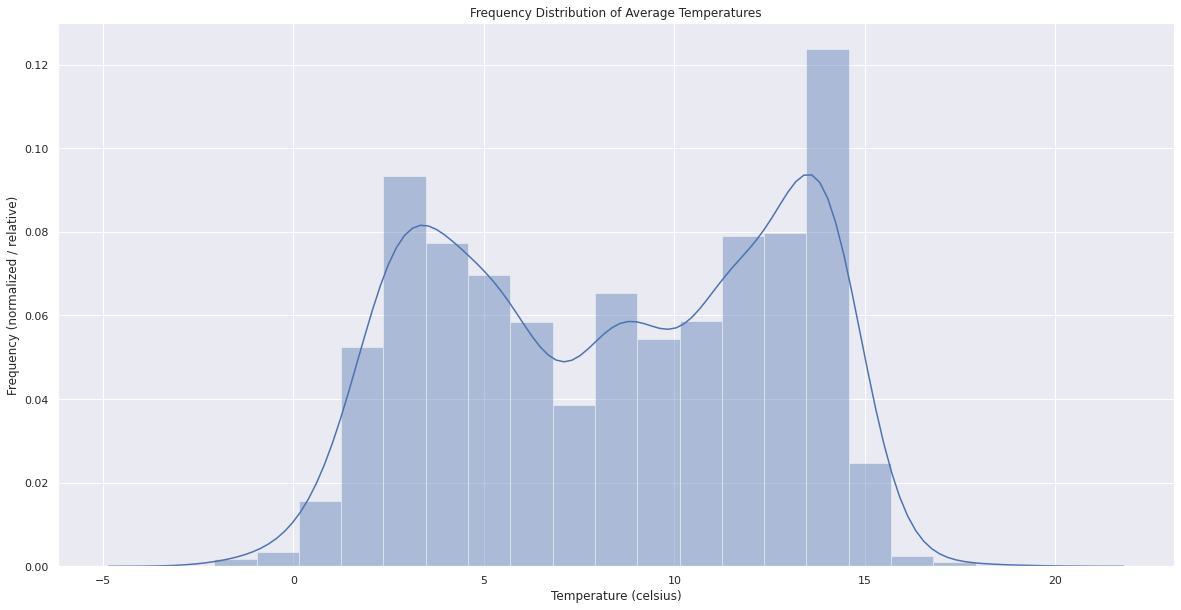

In [ ]:
# Frequency distribution - do a histogram-like plot.
max_avg_temp = data.max()
min_avg_temp = data.min()
avg_temp_range = max_avg_temp - min_avg_temp
print('Average temperature range: %.3f celsius' % avg_temp_range)

sns.set()
plt.figure(figsize= (20,10))
sns.distplot(data)
plt.title('Frequency Distribution of Average Temperatures')
plt.xlabel('Temperature (celsius)')
plt.ylabel('Frequency (normalized / relative)')
plt.show()

As can be seen, the **median temperature is about 9 degrees celsius** and the **mode temperature is about 14 degrees celsius**.

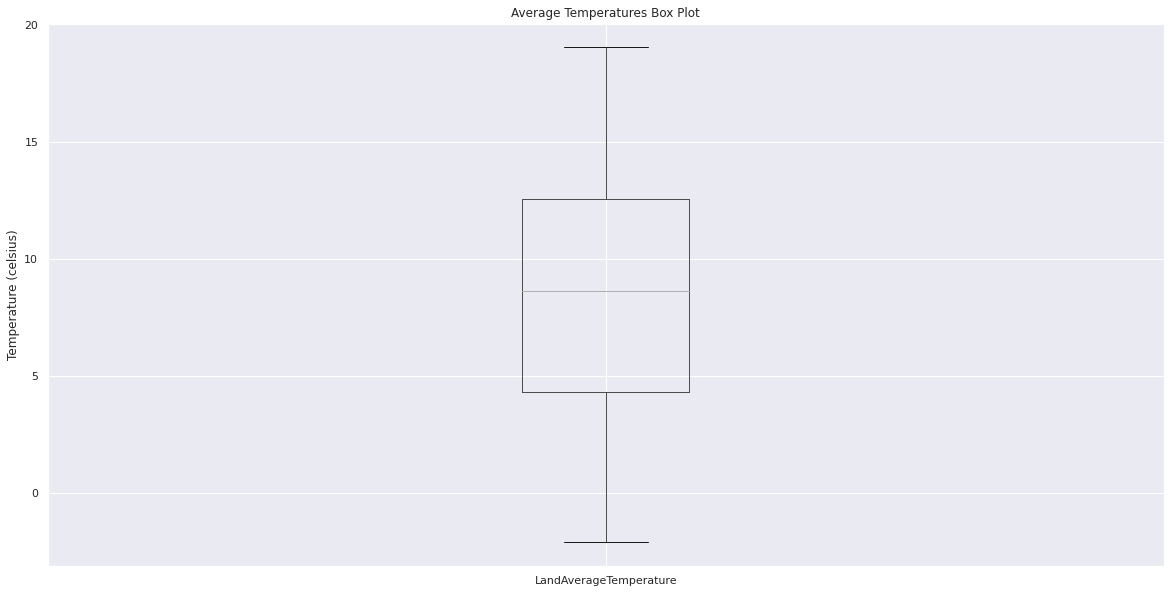

In [ ]:
# Also, let's just do a simple box plot

plt.figure(figsize=(20, 10))
d1.boxplot(column='LandAverageTemperature')
plt.title('Average Temperatures Box Plot')
plt.ylabel('Temperature (celsius)')
plt.show()

Now we perform simple linear regression to build a predictive model for our temperature time series data.

In [ ]:
from sklearn.linear_model import LinearRegression as LinReg

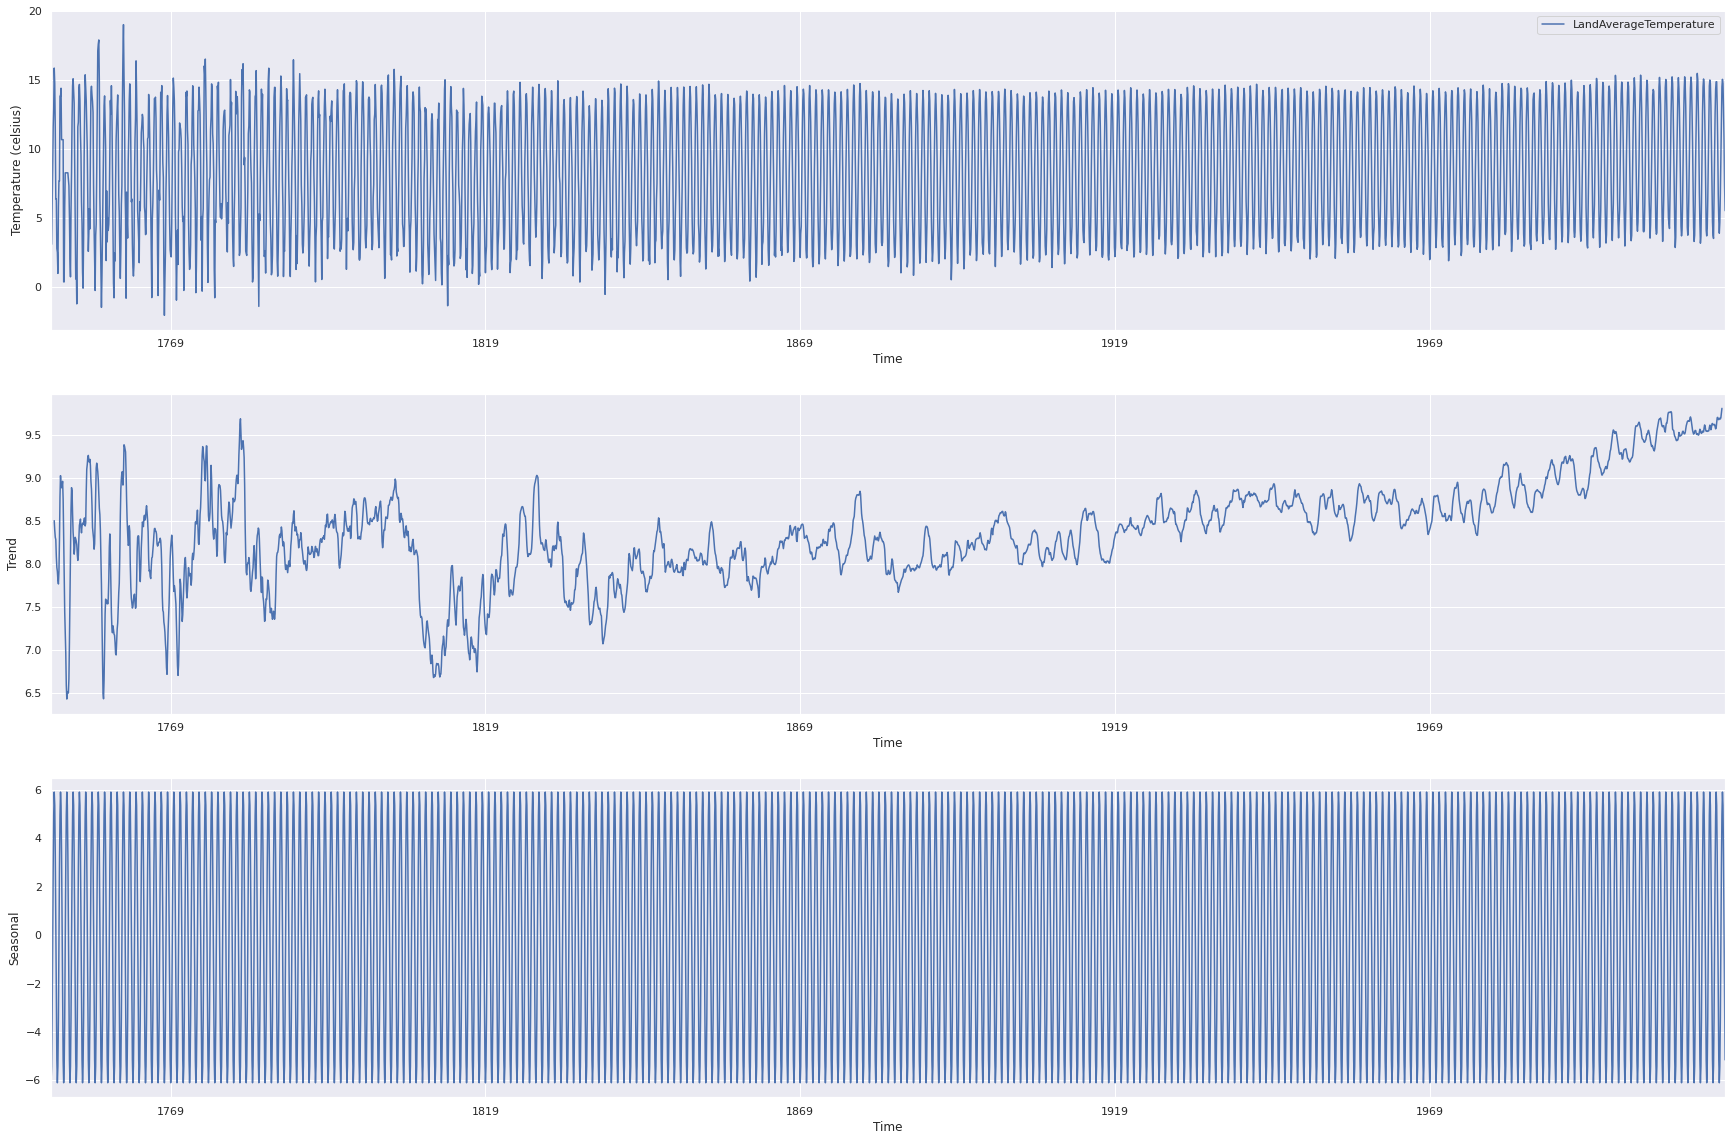

In [ ]:
# Decomposing seasons out of temperature data
d1.index = times

res = sm.tsa.seasonal_decompose(d1['LandAverageTemperature'])
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(30, 20))
d1.plot(ax=ax1)
ax1.set(xlabel='Time', ylabel='Temperature (celsius)')

res.trend.plot(ax=ax2)
ax2.set(xlabel='Time', ylabel='Trend')

res.seasonal.plot(ax=ax3)
ax3.set(xlabel='Time', ylabel='Seasonal')

plt.show()

In the above plot, we decompose the overall temperature data into seasonal and trend parts, and thus observe that the trend follows the same pattern as that of the yearly average plot drawn above.

In [ ]:
from sklearn.linear_model import LinearRegression as LinReg

x = grouped.index.values.reshape(-1,1)
y = grouped['LandAverageTemperature'].values

reg = LinReg()
reg.fit(x,y)
y_preds = reg.predict(x)
print("Accuracy: %.3f" % reg.score(x,y))

Accuracy: 0.387


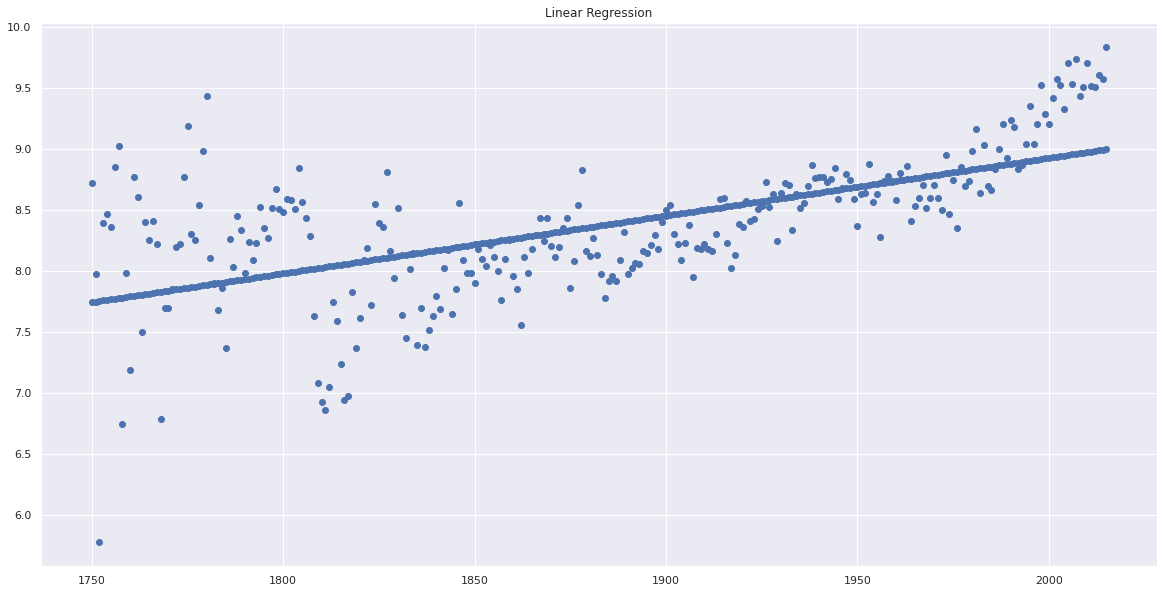

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Linear Regression")
plt.scatter(x = x, y = y_preds)
plt.scatter(x = x,y =y,c = "b")
plt.show()

In [ ]:
print('Predicted temperature of 2300 is: %.3f celsius' % reg.predict([[2300]])[0])

Predicted temperature of 2300 is: 10.345 celsius
